# TP2 - Bayes Inference

In [2]:
#Useful functions
import numpy as np
import matplotlib.pyplot as plt

## Tutorial Objectives

In these tutorials, we will develop a Bayesian model for 
To refine: Guess the size of an object, prior = usual size of a fork, likelihood, visual info we get about the specific fork we see. -> posterior distrib

This model will combine **prior** information about the XXX with sensory information about the **likelihood** that XXX. As we will see in subsequent lessons, the resulting **posterior distribution** not only allows us to make optimal decision about the sound's origin, but also lets us quantify how uncertain that decision is. Bayesian techniques are therefore useful **normative models**: the behavior of human or animal subjects can be compared against these models to determine how efficiently they make use of information. 

This notebook will introduce two fundamental building blocks for Bayesian statistics: the Gaussian distribution and the Bayes Theorem. You will: 

2. Use Bayes' Theorem to find the posterior from a Gaussian-distributed prior and likelihood. 
3. Change the likelihood mean and variance and observe how posterior changes.


# Section 1. Bayes' Theorem and the Posterior


Bayes' rule tells us how to combine two sources of information: the prior (e.g., a noisy representation of our expectations about the object size) and the likelihood (e.g., a noisy representation of the stimulus size on a given trial), to obtain a posterior distribution taking into account both pieces of information. Bayes' rule states:

\begin{eqnarray}
\text{Posterior} = \frac{ \text{Likelihood} \times \text{Prior}}{ \text{Normalization constant}}
\end{eqnarray}

When both the prior and likelihood are Gaussians, this translates into the following form:

$$
\begin{array}{rcl}
\text{Likelihood} &=& \mathcal{N}(\mu_{likelihood},\sigma_{likelihood}^2) \\
\text{Prior} &=& \mathcal{N}(\mu_{prior},\sigma_{prior}^2) \\
\text{Posterior} &\propto& \mathcal{N}(\mu_{likelihood},\sigma_{likelihood}^2) \times \mathcal{N}(\mu_{prior},\sigma_{prior}^2) \\
&&= \mathcal{N}\left( \frac{\sigma^2_{likelihood}\mu_{prior}+\sigma^2_{prior}\mu_{likelihood}}{\sigma^2_{likelihood}+\sigma^2_{prior}}, \frac{\sigma^2_{likelihood}\sigma^2_{prior}}{\sigma^2_{likelihood}+\sigma^2_{prior}} \right) 
\end{array}
$$

In these equations, $\mathcal{N}(\mu,\sigma^2)$ denotes a Gaussian distribution with parameters $\mu$ and $\sigma^2$:
$$
\mathcal{N}(\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \; \exp \bigg( \frac{-(x-\mu)^2}{2\sigma^2} \bigg)
$$

In Exercise 2A, we will use the first form of the posterior, where the two distributions are combined via pointwise multiplication.  Although this method requires more computation, it works for any type of probability distribution. In Exercise 2B, we will see that the closed-form solution shown on the line below produces the same result. 

## Exercise 1A: Finding the posterior computationally

Imagine an experiment where participants estimate the location of . To estimate its position, the participants can use two sources of information: 
  1. new noisy visual information (the likelihood)
  2. prior expectations of where the glasses is likely to be found (visual prior). 

The new visual information and the prior expectations are both noisy, so participants will combine these sources of information to better estimate the position of their glasses.

We will use Gaussian distributions to represent the visual likelihood (in red), and a Gaussian prior (expectations - in blue). Using Bayes rule, you will combine them into a posterior distribution that summarizes the probability that the object is in each location. 


Hint: 

* Use the gaussian function you wrote in the previous tutorial to generate a visual likelihood with parameters $\mu$ = 3 and $\sigma$ = 1.5
* Generate a prior with parameters $\mu$ = -1 and $\sigma$ = 1.5
* Calculate the posterior using pointwise multiplication of the likelihood and prior. Don't forget to normalize so the posterior adds up to 1. 
* Plot the likelihood, prior and posterior using the predefined function `posterior_plot`



In [12]:
def my_gaussian(x_vector,mu,sigma):
    """
  Author: Antoine de Comite 
  This function computes the gaussian distribution characterised by mu & sigma on the set x_vector
  
  Inputs : x_vector (numpy array) the set over which you want to compute the gaussian distribution
           mu (double) mean value of the gaussian distribution
           sigma (double) standard deviation of the gaussian distribution
  Outputs: px (numpy array) is the gaussian distribution evaluated over x_vector
  """
  
    px = np.exp(- 1/2/sigma**2 * (mu - x_vector) ** 2)
    px = px / px.sum()
    return px

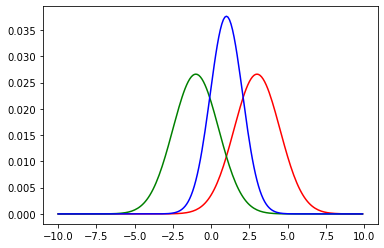

In [13]:
x_vector = np.arange(-10,10,0.1)

#######################################

likelihood = my_gaussian(x_vector,3,1.5)
prior = my_gaussian(x_vector,-1,1.5)
posterior = prior * likelihood
posterior /= posterior.sum()

plt.plot(x_vector, likelihood, 'r')
plt.plot(x_vector,prior,'g')
plt.plot(x_vector, posterior, 'b')

In [21]:
#@title
#@markdown Make sure you execute this cell to enable the widget!

x = np.arange(-10, 11, 0.1)

import ipywidgets as widgets

def refresh(mu_likelihood=3, sigma_likelihood=1.5, mu_prior=-1, sigma_prior=1.5):
    likelihood = my_gaussian(x, mu_likelihood, sigma_likelihood)
    prior = my_gaussian(x, mu_prior, sigma_prior)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    plt.plot(x, likelihood, 'r')
    plt.plot(x,prior,'g')
    plt.plot(x, posterior, 'b')

style = {'description_width': 'initial'}

_ = widgets.interact(refresh,
    mu_posterior=widgets.FloatSlider(value=3, min=-10, max=10, step=0.5, description="mu_likelihood:", style=style),
    sigma_posterior=widgets.FloatSlider(value=1.5, min=0.5, max=10, step=0.5, description="sigma_likelihood:", style=style),
    mu_prior=widgets.FloatSlider(value=-1, min=-10, max=10, step=0.5, description="mu_prior:", style=style),
    sigma_prior=widgets.FloatSlider(value=1.5, min=0.5, max=10, step=0.5, description="sigma_prior:", style=style)
)

interactive(children=(IntSlider(value=3, description='mu_likelihood', max=9, min=-3), FloatSlider(value=1.5, d…

## Exercise 1B: Finding the posterior analytically

As you may have noticed from the interactive demo, the product of two Gaussian distributions, like our prior and likelihood, remains a Gaussian, regardless of the parameters. We can directly compute the  parameters of that Gaussian from the means and variances of the prior and likelihood. For example, the posterior mean is given by:

$$ \mu_{posterior} = \frac{\mu_{auditory} \cdot \frac{1}{\sigma_{auditory}^2} + \mu_{visual} \cdot \frac{1}{\sigma_{visual}^2}}{1/\sigma_{auditory}^2 + 1/\sigma_{visual}^2} 
$$

This formula is a special case for two Gaussians, but is a very useful one because:
*   The posterior has the same form (here, a normal distribution) as the prior, and
*   There is simple, closed-form expression for its parameters.

When these properties hold, we call them **conjugate distributions** or **conjugate priors** (for a particular likelihood). Working with conjugate distributions is very convenient; otherwise, it is often necessary to use computationally-intensive numerical methods to combine the prior and likelihood. 

In this exercise, we ask you to verify that property.  To do so, we will hold our auditory likelihood constant as an $\mathcal{N}(3, 1.5)$ distribution, while considering visual priors with different means ranging from $\mu=-10$ to $\mu=10$. For each prior,

* Compute the posterior distribution using the function you wrote in Exercise 2A. Next, find its mean. The mean of a probability distribution is $\int_x p(x) dx$ or $\sum_x x\cdot p(x)$. 
* Compute the analytical posterior mean from auditory and visual using the equation above.
* Use the provided plotting code to plot both estimates of the mean. 

Are the estimates of the posterior mean the same in both cases? 

Using these results, try to predict the posterior mean for the combination of a $\mathcal{N}(-4,4)$ prior and and $\mathcal{N}(4, 2)$ likelihood. Use the widget above to check your prediction. You can enter values directly by clicking on the numbers to the right of each slider; $\sqrt{2} \approx 1.41$.